In [1]:
from tensors import *
import numpy as np
from nets import *
from layers import *
from dataloader import *
from optimizers import *
from utils import *
from loss import *

In [2]:
class Net(NeuralNet):
    def __init__(self) -> None:
        super().__init__()
        self.d1, self.b1, self.r1 = Dense(1, 25), Bias(25), ReLU()
        self.d2, self.b2, self.r2 = Dense(25, 25), Bias(25), ReLU()
        self.d3, self.b3 = Dense(25, 1), Bias(1)

    def forward(self, input):
        x = self.r1(self.b1(self.d1(input)))
        x = self.r2(self.b2(self.d2(x)))
        x = self.b3(self.d3(x))
        return x
        
net = Net()

In [3]:
loss = MSE()
optim = Optimizer(net.parameters)

In [4]:
epochs = 100
batch_size = 10
data_num = 1000
lr = .01

data = MathFunc(np.sin, -np.pi, np.pi, data_num, batch_size)

for epoch in range(epochs):
    for x, y in data():
        optim.zero_grad()

        x, y = Tensor(x), Tensor(y)
        loss(net(x), y)

        loss.backward()
        optim.step(lr)
    if epoch % 5 == 0: print("Epoch {0}: {1}".format(epoch, loss.loss))

Epoch 0: 0.10241397782487416
Epoch 5: 0.034329482899483385
Epoch 10: 0.004881192874199525
Epoch 15: 0.006114219973060225
Epoch 20: 0.004907310041771871
Epoch 25: 0.0029232283246415384
Epoch 30: 0.0036415056587583345
Epoch 35: 0.003675577503267452
Epoch 40: 0.0014341666455718102
Epoch 45: 0.001392918987617077
Epoch 50: 0.0005187156103745489
Epoch 55: 0.0007407708658193412
Epoch 60: 0.0006238928581839679
Epoch 65: 0.00048671549938154564
Epoch 70: 0.0006733445074453258
Epoch 75: 0.00033484428856897974
Epoch 80: 0.0006454140012098675
Epoch 85: 0.00012849941287877993
Epoch 90: 0.00015735816414742327
Epoch 95: 0.00017762987056489787


In [22]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.figure(figsize=(10, 16));

<Figure size 1000x1600 with 0 Axes>

In [17]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
y_hat = net(np.array(np.split(x, len(x))))

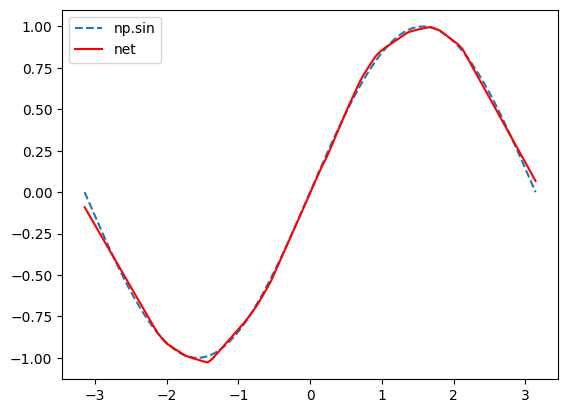

In [28]:
plt.plot(x, y, linestyle="--", label="np.sin")
plt.plot(x, y_hat, color="r", label="net")
plt.legend();